In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [30]:
data=pd.read_csv("iris.csv")

In [31]:
data.sample(2)

,sepal_length,sepal_width,petal_length,petal_width,species
129,7.2,3.0,5.8,1.6,virginica
146,6.3,2.5,5.0,1.9,virginica


In [57]:
x=data.iloc[:,:4]
x=x-x.mean(axis=0)

In [58]:
x.sample(2)

,sepal_length,sepal_width,petal_length,petal_width
13,-1.543333,-0.057333,-2.658,-1.099333
96,-0.143333,-0.157333,0.442,0.100667


In [6]:
xT=(np.transpose(x))

In [7]:
xT.shape

(4, 150)

In [8]:
finalmat=np.matmul(xT,x)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_21216\2107696773.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  finalmat=np.matmul(xT,x)


In [9]:
finalmat

,0,1,2,3
sepal_length,102.168333,-6.322667,189.8730,76.924333
sepal_width,-6.322667,28.306933,-49.1188,-18.124267
petal_length,189.873000,-49.118800,464.3254,193.045800
petal_width,76.924333,-18.124267,193.0458,86.569933


In [10]:
eigvalues=np.linalg.eigh(finalmat)
eigvalues

(array([  3.55142885,  11.65321551,  36.15794144, 630.0080142 ]),
 array([[ 0.31548719,  0.58202985,  0.65658877, -0.36138659],
        [-0.3197231 , -0.59791083,  0.73016143,  0.08452251],
        [-0.47983899, -0.07623608, -0.17337266, -0.85667061],
        [ 0.75365743, -0.54583143, -0.07548102, -0.3582892 ]]))

In [60]:
eigvalues[0]/sum(eigvalues[0])

array([0.00521218, 0.01710261, 0.05306648, 0.92461872])

In [11]:
new_features=np.matmul(x,eigvalues[1])
new_features

,0,1,2,3
0,0.002262,0.027915,0.319397,2.684126
1,0.099027,0.210464,-0.177001,2.714142
2,0.019968,-0.017900,-0.144949,2.888991
3,-0.075576,-0.031559,-0.318299,2.745343
4,-0.061259,-0.090079,0.326755,2.728717
...,...,...,...,...
145,0.426196,-0.177825,0.187532,-1.944110
146,0.254367,0.121898,-0.375317,-1.527167
147,0.137001,-0.130482,0.078859,-1.764346
148,0.044595,-0.723252,0.116628,-1.900942


In [12]:
z1=new_features[3]
np.reshape(np.array(z1),(150,1))

array([[ 2.68412563],
       [ 2.71414169],
       [ 2.88899057],
       [ 2.74534286],
       [ 2.72871654],
       [ 2.28085963],
       [ 2.82053775],
       [ 2.62614497],
       [ 2.88638273],
       [ 2.6727558 ],
       [ 2.50694709],
       [ 2.61275523],
       [ 2.78610927],
       [ 3.22380374],
       [ 2.64475039],
       [ 2.38603903],
       [ 2.62352788],
       [ 2.64829671],
       [ 2.19982032],
       [ 2.5879864 ],
       [ 2.31025622],
       [ 2.54370523],
       [ 3.21593942],
       [ 2.30273318],
       [ 2.35575405],
       [ 2.50666891],
       [ 2.46882007],
       [ 2.56231991],
       [ 2.63953472],
       [ 2.63198939],
       [ 2.58739848],
       [ 2.4099325 ],
       [ 2.64886233],
       [ 2.59873675],
       [ 2.63692688],
       [ 2.86624165],
       [ 2.62523805],
       [ 2.80068412],
       [ 2.98050204],
       [ 2.59000631],
       [ 2.77010243],
       [ 2.84936871],
       [ 2.99740655],
       [ 2.40561449],
       [ 2.20948924],
       [ 2

In [20]:
encoder=LabelEncoder()
data["species"]=encoder.fit_transform(data["species"])

In [14]:
x_train,x_test,y_train,y_test=train_test_split(new_features.iloc[:,3:4],data["species"],test_size=0.2)

In [15]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [16]:
pred=model.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      1.00      0.95         9
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



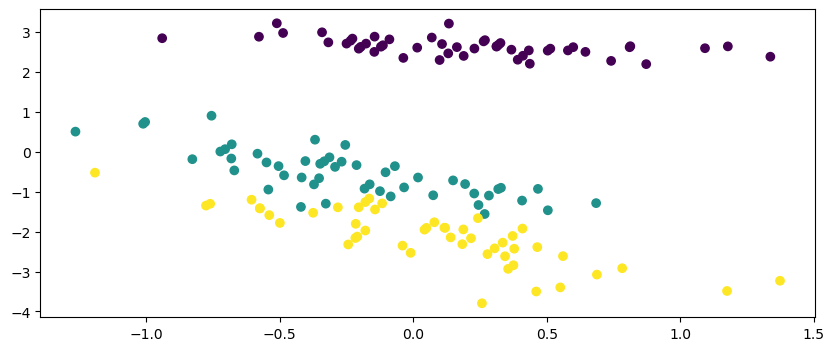

In [17]:
plt.figure(figsize=(10,4))
plt.scatter(new_features.iloc[:,2],new_features.iloc[:,3],c=data["species"])

# Method 2

In [18]:
val,vec=np.linalg.eigh(np.dot(x.T,x))

In [19]:
val

array([  3.55142885,  11.65321551,  36.15794144, 630.0080142 ])

In [20]:
new_fea=np.dot(x,vec)

In [37]:
x_train,x_test,y_train,y_test=train_test_split(new_fea[:,3:],data["species"],test_size=0.2)

In [38]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [39]:
pred=model.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.80      0.89        10
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30



# method 3

In [32]:
from sklearn.decomposition import PCA

In [33]:
x=data.iloc[:,:4]
x=x-x.mean(axis=0)
encoder=LabelEncoder()
data["species"]=encoder.fit_transform(data["species"])

In [34]:
pca=PCA(n_components=2)
pca_feature=pca.fit_transform(x)

In [35]:
x_train,x_test,y_train,y_test=train_test_split(pca_feature[:,0:1],data["species"],test_size=0.2)

In [36]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [37]:
pred=model.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.91      0.95        11
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

